In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Pokémon dataset
pokemon_df = pd.read_csv('../data/pokemon_dataset.csv')


# Display the first few rows of the dataset
pokemon_df.head()

,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,NaN,red/blue,gen 1,regular,309,39,52,43,60,50,65
4,5,charmeleon,fire,NaN,red/blue,gen 1,regular,405,58,64,58,80,65,80


In [26]:
pokemon_df.shape

(1025, 14)

In [7]:
print(pokemon_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pokemon_id        1025 non-null   int64 
 1   name              1025 non-null   object
 2   primary_type      1025 non-null   object
 3   secondary_type    526 non-null    object
 4   first_appreance   1025 non-null   object
 5   generation        1025 non-null   object
 6   category          1025 non-null   object
 7   total_base_stats  1025 non-null   int64 
 8   hp                1025 non-null   int64 
 9   attack            1025 non-null   int64 
 10  defense           1025 non-null   int64 
 11  special_attack    1025 non-null   int64 
 12  special_defense   1025 non-null   int64 
 13  speed             1025 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 112.2+ KB
None


In [ ]:
# Check for missing values
missing_values = pokemon_df.isnull().sum()
print(missing_values)


pokemon_id            0
name                  0
primary_type          0
secondary_type      499
first_appreance       0
generation            0
category              0
total_base_stats      0
hp                    0
attack                0
defense               0
special_attack        0
special_defense       0
speed                 0
dtype: int64


In [10]:
# Fill missing secondary_type with 'None' without inplace
pokemon_df['secondary_type'] = pokemon_df['secondary_type'].fillna('None')

# Verify if missing values are handled
print(pokemon_df['secondary_type'].isnull().sum())


0


In [11]:
from scipy import stats

# Select numerical columns
numerical_cols = ['total_base_stats', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

# Calculate the Z-scores for each numerical column
z_scores = stats.zscore(pokemon_df[numerical_cols])

# Convert Z-scores to a DataFrame for better readability
z_scores_df = pd.DataFrame(z_scores, columns=numerical_cols)

# Identify rows where the absolute Z-score is greater than a threshold (commonly 3)
outliers = (abs(z_scores_df) > 3).any(axis=1)

# Display the outliers
outliers_data = pokemon_df[outliers]
print(outliers_data)


      pokemon_id        name primary_type secondary_type first_appreance  \
90            91    cloyster        water            ice        red/blue   
112          113     chansey       normal           None        red/blue   
142          143     snorlax       normal           None        red/blue   
201          202   wobbuffet      psychic           None     gold/silver   
207          208     steelix        steel         ground     gold/silver   
212          213     shuckle          bug           rock     gold/silver   
241          242     blissey       normal           None     gold/silver   
248          249       lugia      psychic         flying     gold/silver   
249          250       ho-oh         fire         flying     gold/silver   
290          291     ninjask          bug         flying   ruby/sapphire   
305          306      aggron        steel           rock   ruby/sapphire   
320          321     wailord        water           None   ruby/sapphire   
376         

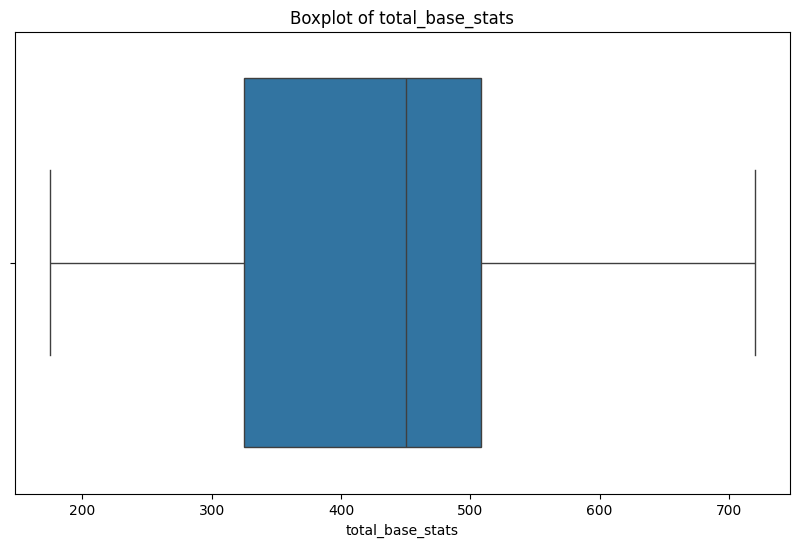

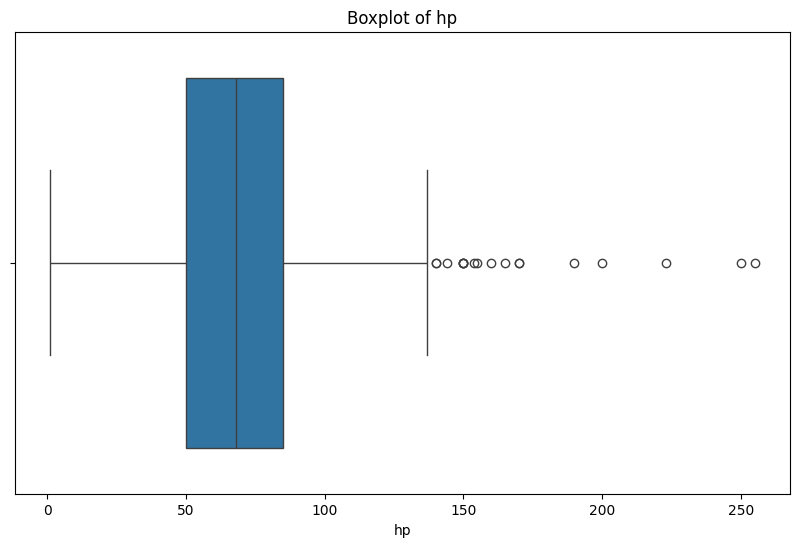

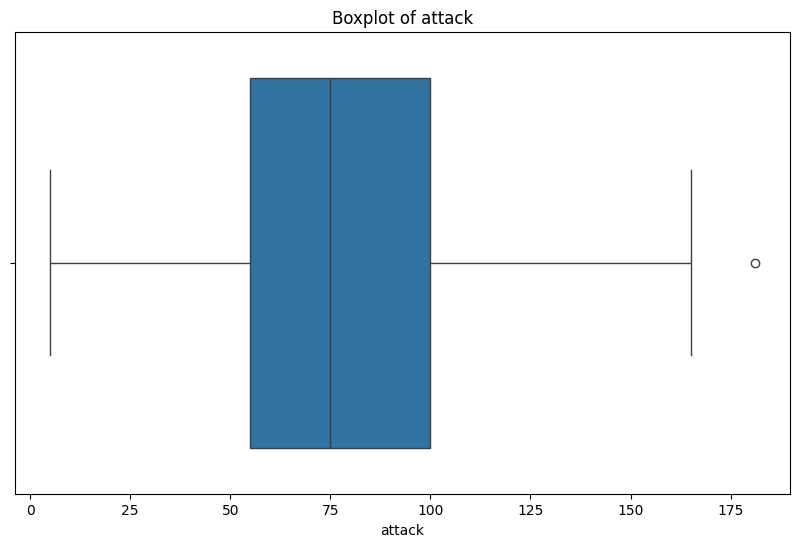

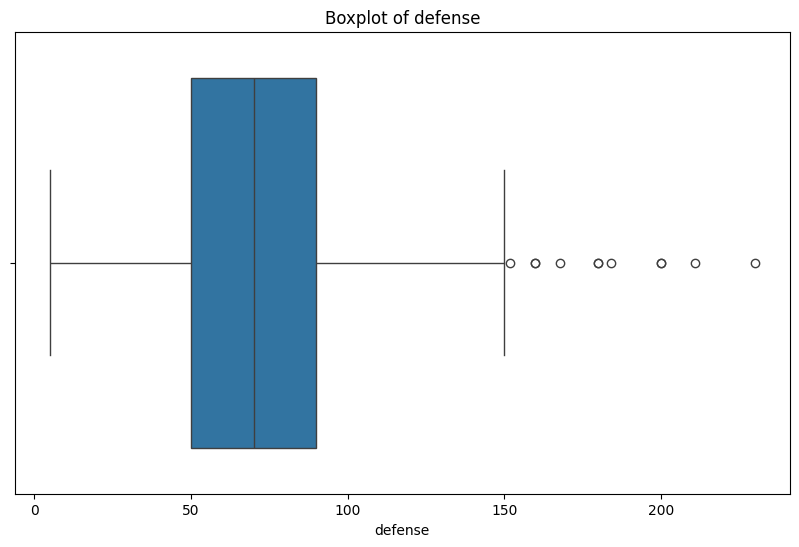

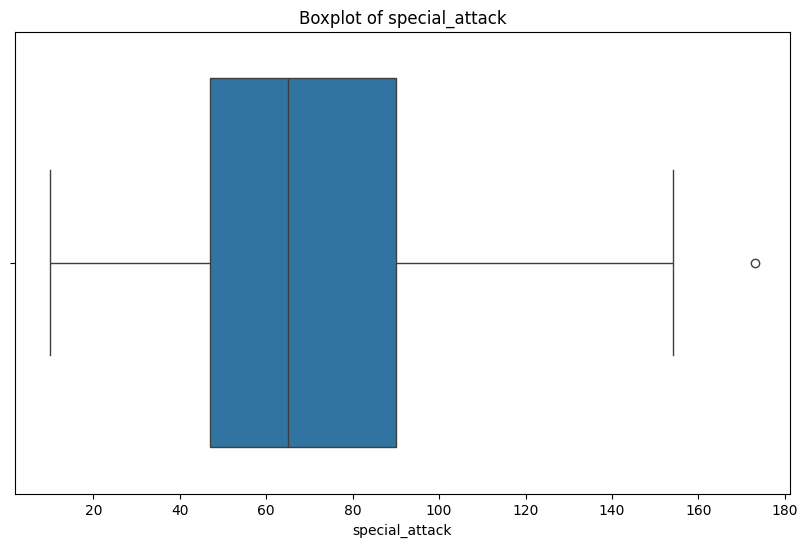

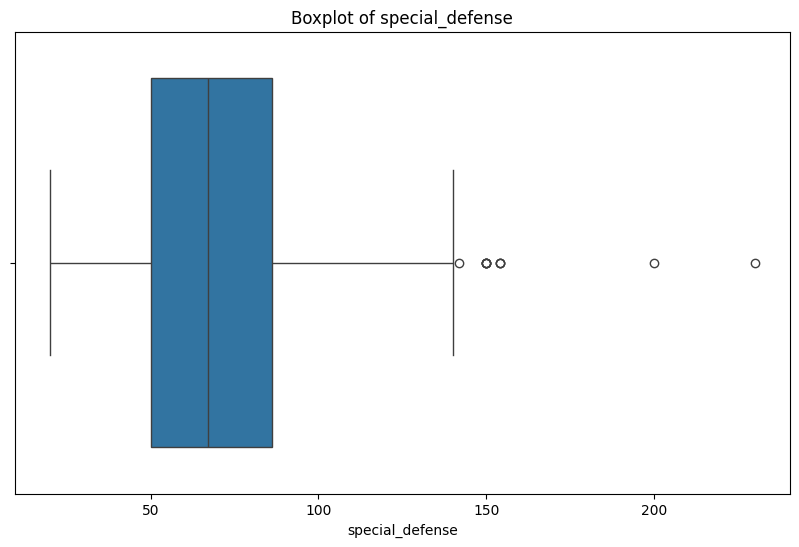

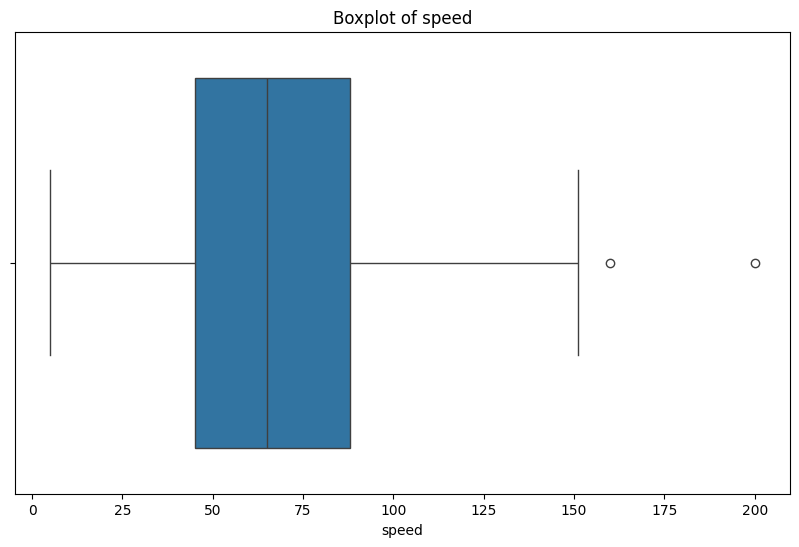

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each numerical column to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=pokemon_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

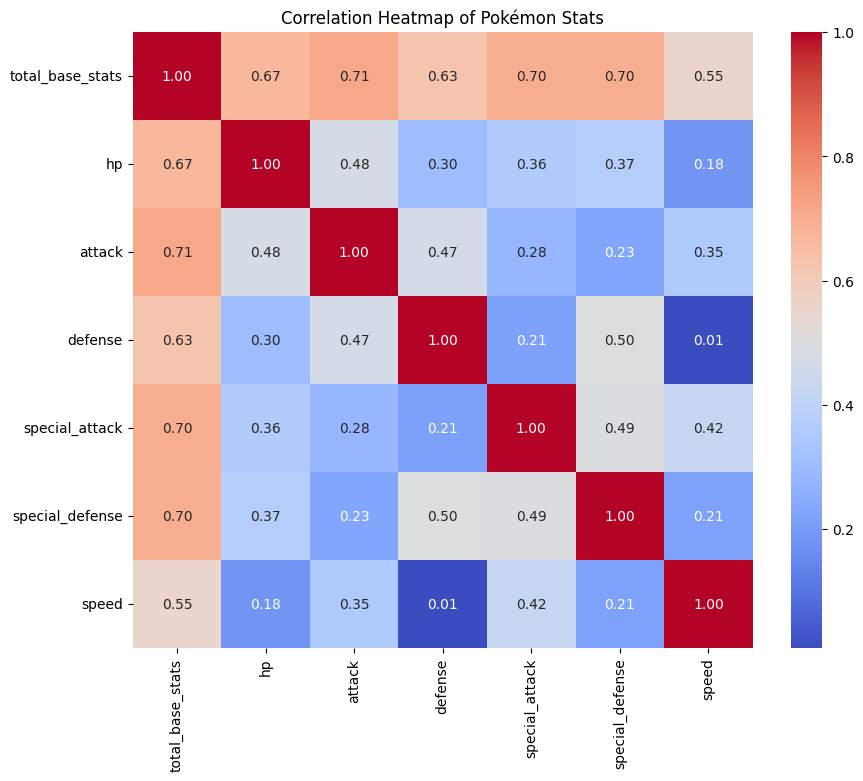

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = pokemon_df[numerical_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()


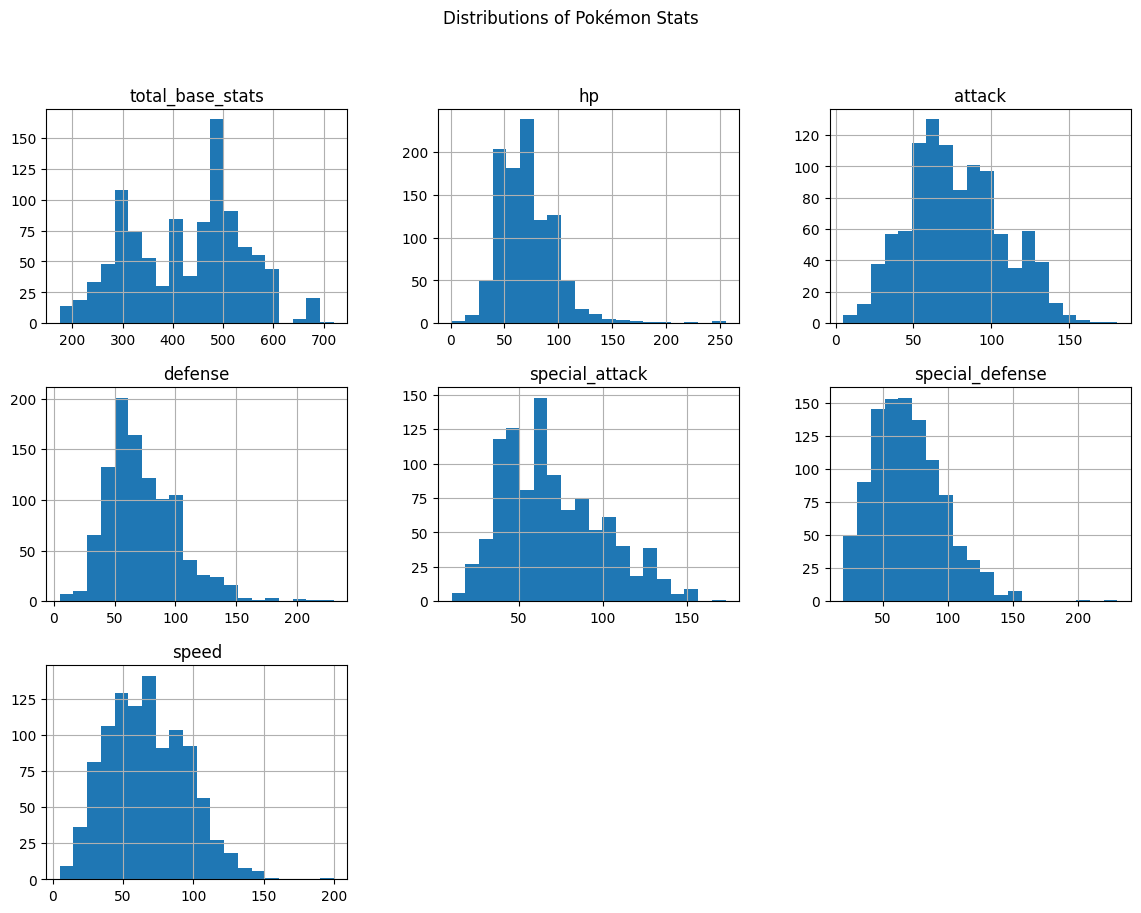

In [14]:
# Histogram for each numerical column
pokemon_df[numerical_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distributions of Pokémon Stats')
plt.show()

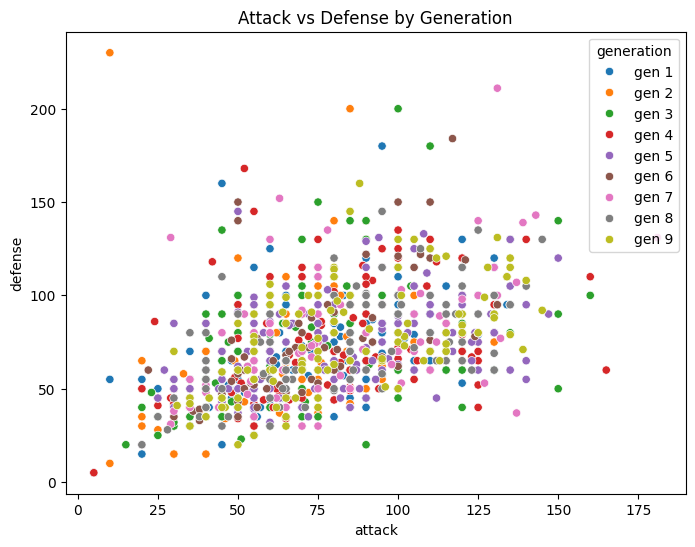

In [15]:
# Scatter plot of Attack vs. Defense
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pokemon_df, x='attack', y='defense', hue='generation')
plt.title('Attack vs Defense by Generation')
plt.show()

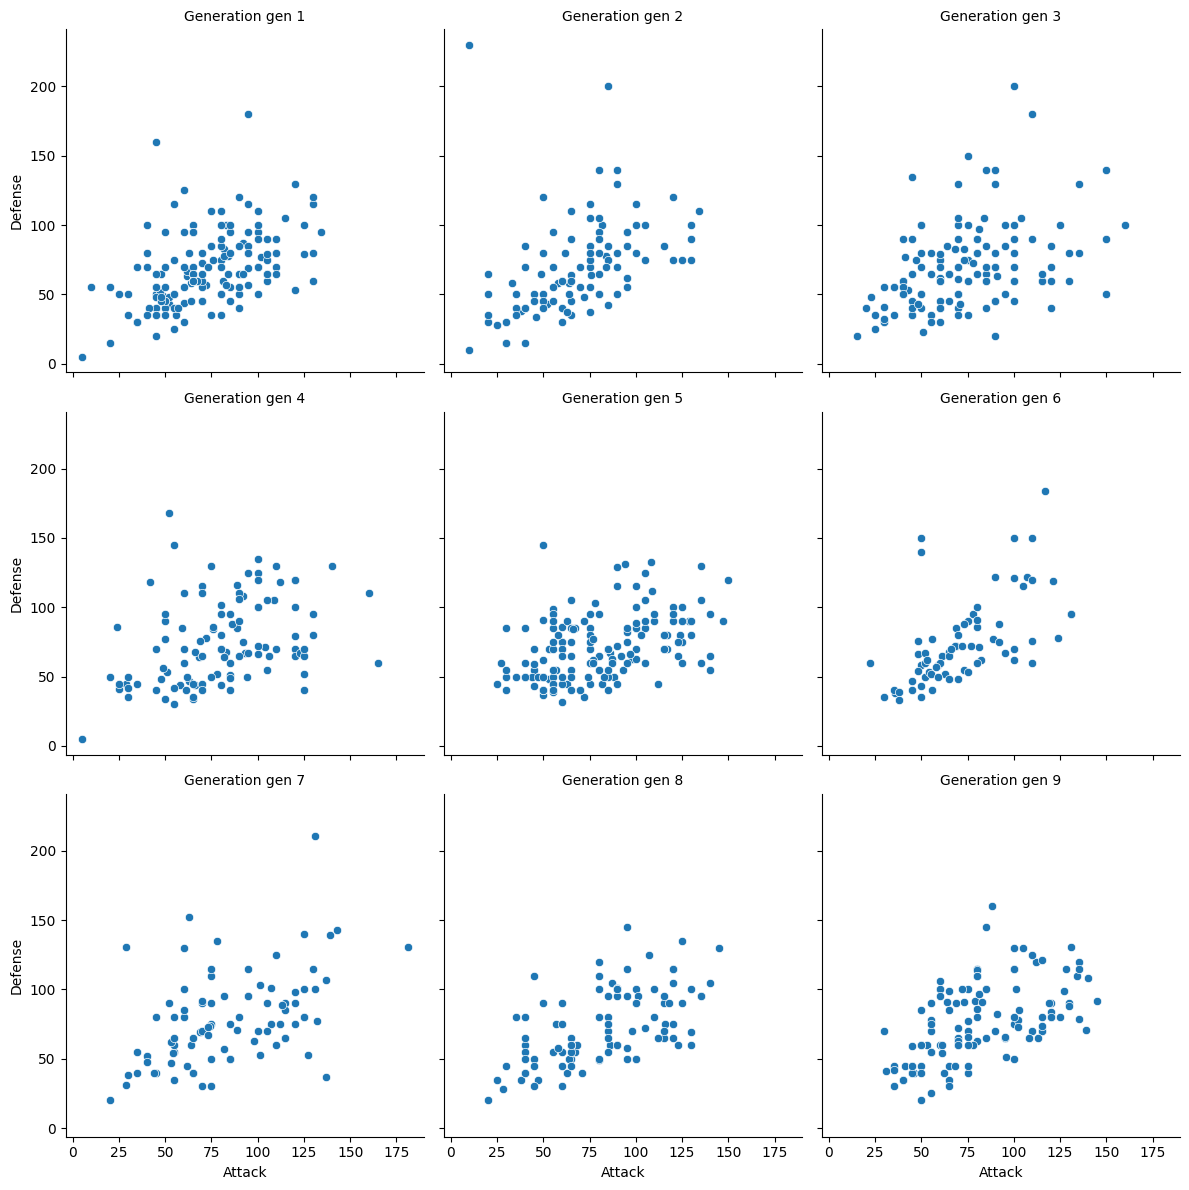

In [16]:
# Create a FacetGrid to separate the generations
g = sns.FacetGrid(pokemon_df, col='generation', col_wrap=3, height=4)  # Wrap at 3 generations per row
g.map(sns.scatterplot, 'attack', 'defense')
g.set_titles('Generation {col_name}')
g.set_axis_labels('Attack', 'Defense')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_27208\184002738.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='viridis')


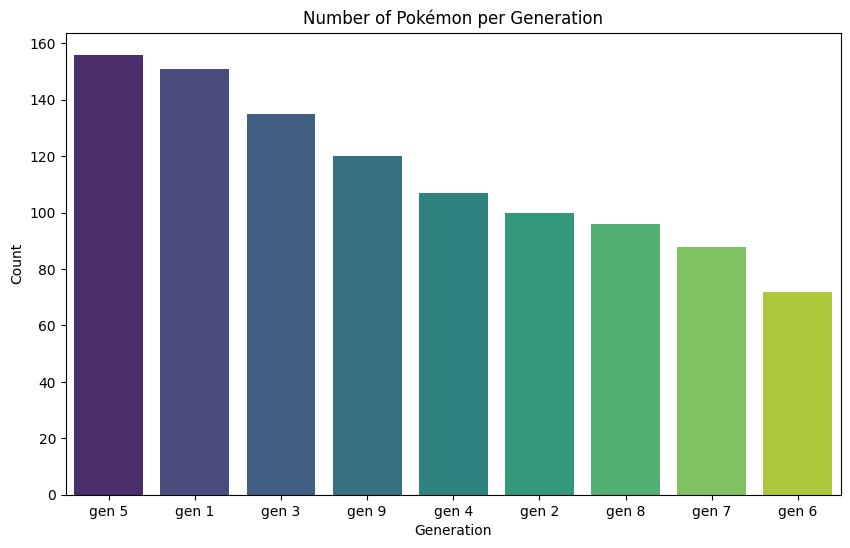

In [17]:
# Count the number of Pokémon per generation
generation_counts = pokemon_df['generation'].value_counts()

# Plot the number of Pokémon by generation
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='viridis')
plt.title('Number of Pokémon per Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_27208\3793143592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pokemon_df, x='generation', y='total_base_stats', palette='Set3')


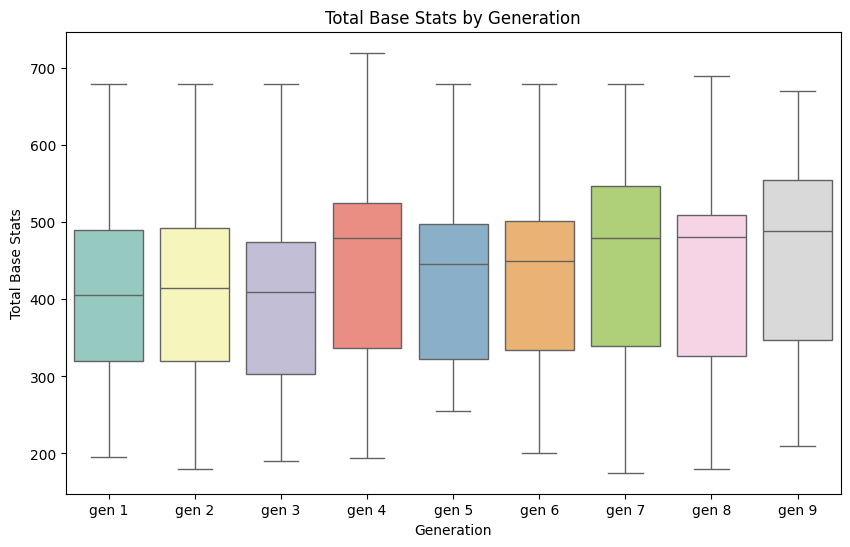

In [19]:
# Compare base stats by generation (using total_base_stats as an example)
plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon_df, x='generation', y='total_base_stats', palette='Set3')
plt.title('Total Base Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Base Stats')
plt.show()

In [23]:
# Comptabiliser le nombre de Pokémon pour chaque type primaire par génération
primary_type_counts = pokemon_df.groupby(['generation', 'primary_type']).size().unstack(fill_value=0)

# Afficher le tableau pour vérifier
primary_type_counts.head()

primary_type,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
gen 1,12,0,3,9,2,7,12,0,3,12,8,2,22,14,8,9,0,28
gen 2,10,5,0,6,5,2,8,0,1,9,3,4,15,1,7,4,2,18
gen 3,12,4,7,4,0,4,6,0,4,12,6,6,18,3,8,8,9,24
gen 4,8,3,3,7,1,2,5,0,6,13,4,3,17,6,7,6,3,13
gen 5,18,13,7,7,0,7,8,1,5,15,9,6,17,2,14,6,4,17


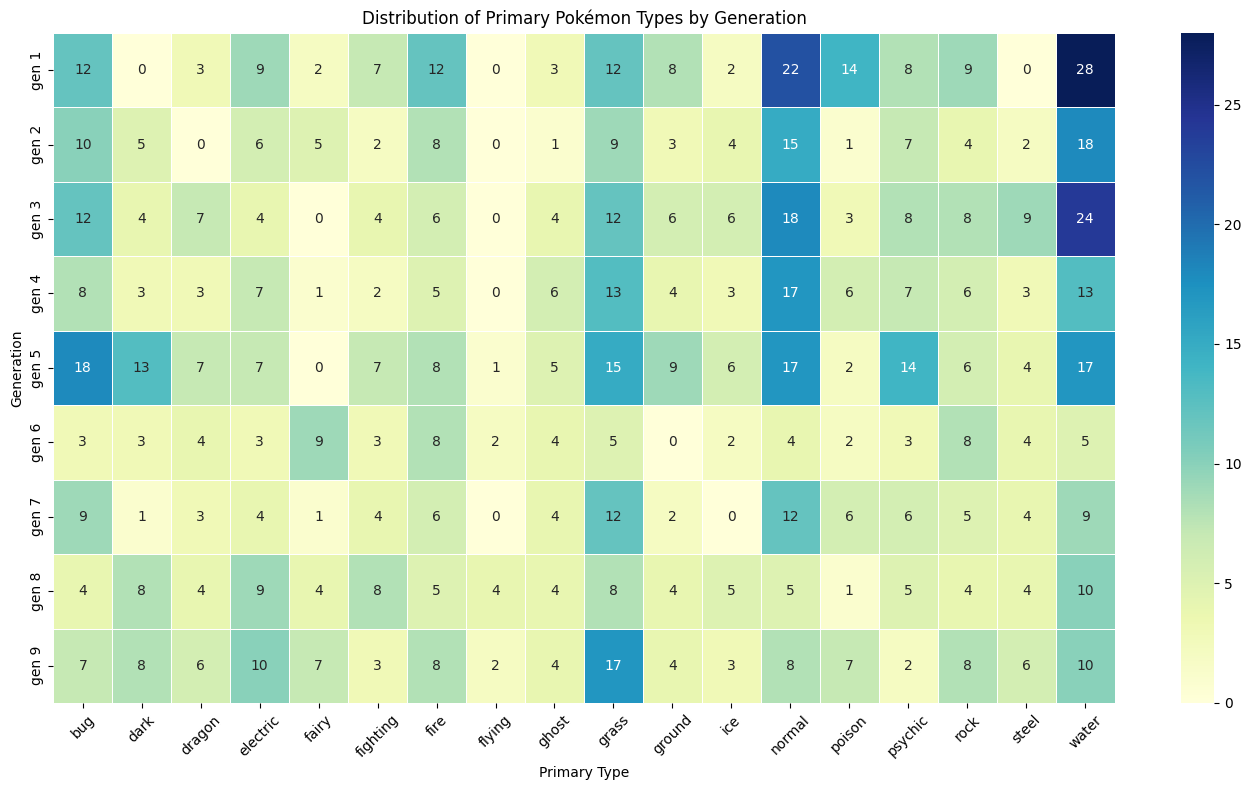

In [24]:
import seaborn as sns

# Créer une heatmap pour visualiser les types par génération
plt.figure(figsize=(14, 8))
sns.heatmap(primary_type_counts, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)

plt.title('Distribution of Primary Pokémon Types by Generation')
plt.xlabel('Primary Type')
plt.ylabel('Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_14212\3699634415.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='viridis')


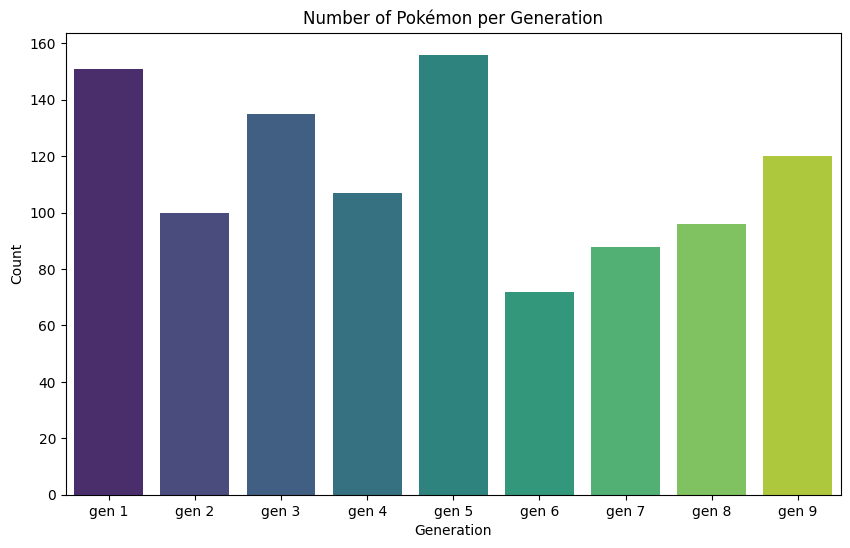

In [7]:
# Count the number of Pokémon per generation (already done)
generation_counts = pokemon_df['generation'].value_counts()

# Sort the generations in ascending order
generation_counts = generation_counts.sort_index()

# Plot the number of Pokémon by generation
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='viridis')
plt.title('Number of Pokémon per Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

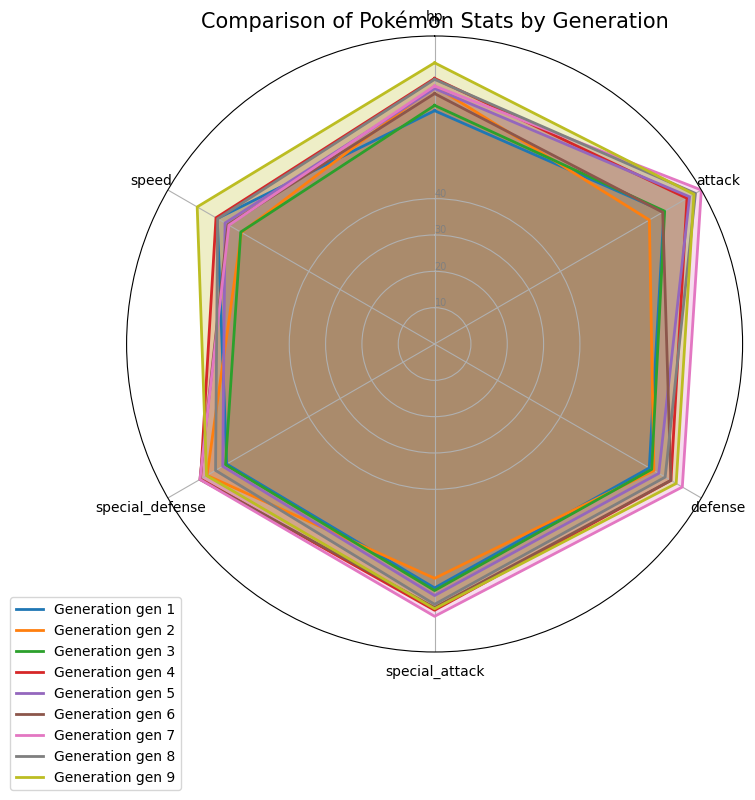

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Calculate the average stats by generation
generation_stats = pokemon_df.groupby('generation')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].mean()

# List of categories (stats)
categories = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
N = len(categories)

# Calculate the angle of each axis (divide the plot by number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the radar loop by adding the first angle again

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# If you want the first axis to be at the top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Add labels for each axis
plt.xticks(angles[:-1], categories)

# Add labels for the radial axes
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30, 40], ["10", "20", "30", "40"], color="grey", size=7)
plt.ylim(0, generation_stats.max().max())  # Set the limit of the radar chart based on the max value of the stats

# Plot each generation on the radar chart
for generation in generation_stats.index:
    values = generation_stats.loc[generation].tolist()  # Get the values for the generation
    values += values[:1]  # Add the first value again to close the radar loop

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Generation {generation}')
    ax.fill(angles, values, alpha=0.25)  # Fill under the curve

# Add the legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the chart
plt.title('Comparison of Pokémon Stats by Generation', size=15)
plt.show()

